# Decision Tree Example

### 라이브러리 선언

In [1]:
import numpy as np
import pandas as pd 

# 모델 라이브러리 선언
from sklearn import datasets, tree

# 모델 정확도 라이브러리 선언
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# CSV 파일을 읽어 DataFrame 변수에 저장하기
featuresData = pd.read_csv("../dataset./feature_regression_example.csv")
featuresData.head()

REGIONID PRODUCTGROUP      PRODUCT      ITEM  YEARWEEK  YEAR  WEEK  \
0  SEOUL_BANK_001         PG02  PRODUCT0010  ITEM0115    201501  2015     1   
1  SEOUL_BANK_001         PG02  PRODUCT0010  ITEM0115    201502  2015     2   
2  SEOUL_BANK_001         PG02  PRODUCT0010  ITEM0115    201503  2015     3   
3  SEOUL_BANK_001         PG02  PRODUCT0010  ITEM0115    201504  2015     4   
4  SEOUL_BANK_001         PG02  PRODUCT0010  ITEM0115    201505  2015     5   

    QTY HOLIDAY  HCLUS PROMOTION  PRO_PERCENT  
0  1225       Y      1         Y     0.209442  
1   968       N      4         Y     0.209442  
2  1209       N      4         Y     0.208155  
3  1810       Y      2         Y     0.208155  
4  1773       N      4         Y     0.208155

### [실습] 1. 타입통합 및 특성숫자 타입 변환

In [2]:
featuresData.dtypes

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int64
YEAR              int64
WEEK              int64
QTY               int64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
dtype: object

In [3]:
# 데이터 타입 표준화
featuresData["YEARWEEK"] = featuresData.YEARWEEK.astype(int)
featuresData["YEAR"] = featuresData.YEARWEEK.astype(int)
featuresData["WEEK"] = featuresData.YEARWEEK.astype(int)

In [4]:
featuresData.dtypes

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int32
YEAR              int32
WEEK              int32
QTY               int64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
dtype: object

In [5]:
# 특성 타입 추가
featuresData["HO_YN"] = np.where(featuresData.HOLIDAY == "Y", 1,0)
featuresData["PRO_YN"] = np.where(featuresData.PROMOTION == "Y", 1,0)
featuresData.head()

REGIONID PRODUCTGROUP      PRODUCT      ITEM  YEARWEEK    YEAR  \
0  SEOUL_BANK_001         PG02  PRODUCT0010  ITEM0115    201501  201501   
1  SEOUL_BANK_001         PG02  PRODUCT0010  ITEM0115    201502  201502   
2  SEOUL_BANK_001         PG02  PRODUCT0010  ITEM0115    201503  201503   
3  SEOUL_BANK_001         PG02  PRODUCT0010  ITEM0115    201504  201504   
4  SEOUL_BANK_001         PG02  PRODUCT0010  ITEM0115    201505  201505   

     WEEK   QTY HOLIDAY  HCLUS PROMOTION  PRO_PERCENT  HO_YN  PRO_YN  
0  201501  1225       Y      1         Y     0.209442      1       1  
1  201502   968       N      4         Y     0.209442      0       1  
2  201503  1209       N      4         Y     0.208155      0       1  
3  201504  1810       Y      2         Y     0.208155      1       1  
4  201505  1773       N      4         Y     0.208155      0       1

In [6]:
# 데이터 조회
featuresData = featuresData[ (featuresData.YEARWEEK >= 201501) & \
                             (featuresData.YEARWEEK <= 201652)]
featuresData.head()
print(featuresData.YEARWEEK.min())
print(featuresData.YEARWEEK.max())

201501
201652


### 2. 특성선정 및 데이터 분리

In [7]:
featuresData.corr()

YEARWEEK      YEAR      WEEK       QTY     HCLUS  PRO_PERCENT  \
YEARWEEK     1.000000  1.000000  1.000000  0.112267 -0.071586     0.404889   
YEAR         1.000000  1.000000  1.000000  0.112267 -0.071586     0.404889   
WEEK         1.000000  1.000000  1.000000  0.112267 -0.071586     0.404889   
QTY          0.112267  0.112267  0.112267  1.000000 -0.537230     0.700195   
HCLUS       -0.071586 -0.071586 -0.071586 -0.537230  1.000000    -0.545619   
PRO_PERCENT  0.404889  0.404889  0.404889  0.700195 -0.545619     1.000000   
HO_YN        0.049867  0.049867  0.049867  0.505932 -0.974601     0.487062   
PRO_YN       0.205916  0.205916  0.205916  0.612451 -0.374072     0.898554   

                HO_YN    PRO_YN  
YEARWEEK     0.049867  0.205916  
YEAR         0.049867  0.205916  
WEEK         0.049867  0.205916  
QTY          0.505932  0.612451  
HCLUS       -0.974601 -0.374072  
PRO_PERCENT  0.487062  0.898554  
HO_YN        1.000000  0.365148  
PRO_YN       0.365148  1.000000

In [8]:
# 상관관계 확인
corrDf = featuresData.corr()
corrDf.head()

YEARWEEK      YEAR      WEEK       QTY     HCLUS  PRO_PERCENT  \
YEARWEEK  1.000000  1.000000  1.000000  0.112267 -0.071586     0.404889   
YEAR      1.000000  1.000000  1.000000  0.112267 -0.071586     0.404889   
WEEK      1.000000  1.000000  1.000000  0.112267 -0.071586     0.404889   
QTY       0.112267  0.112267  0.112267  1.000000 -0.537230     0.700195   
HCLUS    -0.071586 -0.071586 -0.071586 -0.537230  1.000000    -0.545619   

             HO_YN    PRO_YN  
YEARWEEK  0.049867  0.205916  
YEAR      0.049867  0.205916  
WEEK      0.049867  0.205916  
QTY       0.505932  0.612451  
HCLUS    -0.974601 -0.374072

In [9]:
# 인덱스컬럼 초기화
corrResult = corrDf.reset_index()

In [10]:
corrResult

index  YEARWEEK      YEAR      WEEK       QTY     HCLUS  PRO_PERCENT  \
0     YEARWEEK  1.000000  1.000000  1.000000  0.112267 -0.071586     0.404889   
1         YEAR  1.000000  1.000000  1.000000  0.112267 -0.071586     0.404889   
2         WEEK  1.000000  1.000000  1.000000  0.112267 -0.071586     0.404889   
3          QTY  0.112267  0.112267  0.112267  1.000000 -0.537230     0.700195   
4        HCLUS -0.071586 -0.071586 -0.071586 -0.537230  1.000000    -0.545619   
5  PRO_PERCENT  0.404889  0.404889  0.404889  0.700195 -0.545619     1.000000   
6        HO_YN  0.049867  0.049867  0.049867  0.505932 -0.974601     0.487062   
7       PRO_YN  0.205916  0.205916  0.205916  0.612451 -0.374072     0.898554   

      HO_YN    PRO_YN  
0  0.049867  0.205916  
1  0.049867  0.205916  
2  0.049867  0.205916  
3  0.505932  0.612451  
4 -0.974601 -0.374072  
5  0.487062  0.898554  
6  1.000000  0.365148  
7  0.365148  1.000000

In [11]:
# 상관관계 계수 비율 선정
featuresStd = 0.6

In [12]:
# Feature 선택
features = corrResult[ (corrResult.QTY != 1) & 
            (abs(corrResult.QTY) > featuresStd)]["index"].tolist()
features

['PRO_PERCENT', 'PRO_YN']

In [13]:
label = ['QTY']
label

['QTY']

In [14]:
features

['PRO_PERCENT', 'PRO_YN']

In [15]:
# 데이터 분리
yearweekStd = 201630

trainingData_features = featuresData[featuresData.YEARWEEK <= yearweekStd][features]
trainingData_label = featuresData[featuresData.YEARWEEK <= yearweekStd][label]
testData_features = featuresData[featuresData.YEARWEEK > yearweekStd][features]
testData_label = featuresData[featuresData.YEARWEEK > yearweekStd]

[실습]
데이터를 YEARWEEK기준으로 오름차순 정렬한후
80% 20%로 나누어 위에서 작업한 내용을 연산하세요

In [16]:
div = 0.8

In [17]:
std = int(len(featuresData["YEARWEEK"])*div)
std

84

In [18]:
trainingData_features =featuresData.iloc[0:std-1,][features]
trainingData_label =featuresData.iloc[0:std-1,][label]
testData_features = featuresData.iloc[std:,][features]
testData_label = featuresData.iloc[std:,]

### 3. 모델선언 및 학습

In [20]:
# Define Model depth= 100~200
model_method = tree.DecisionTreeRegressor(random_state=1)

In [21]:
# Learning (Feature & Label)
model = model_method.fit(trainingData_features, trainingData_label)

In [22]:
model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

### 4. 예측

In [23]:
predict = model.predict(testData_features)

In [24]:
predict

array([2395.11111111,  335.52173913, 1434.6       , 1434.6       ,
       1434.6       , 1434.6       , 1434.6       , 2395.11111111,
       2395.11111111, 2395.11111111, 2395.11111111,  335.52173913,
       2193.8       , 2193.8       , 2193.8       , 2193.8       ,
       2193.8       , 2193.8       , 2193.8       , 2193.8       ,
       2193.8       ])

### [실습] 5. 데이터 정리

In [25]:
### 데이터프레임으로 변환
predictData = pd.DataFrame(predict)

In [26]:
### 컬럼명 주입
predictData.columns = ["PREDICT"]
predictData.head()

PREDICT
0  2395.111111
1   335.521739
2  1434.600000
3  1434.600000
4  1434.600000

In [27]:
### 테스트데이터 인덱스 초기화
testDataFinal = testData_label.reset_index(drop=True)
testDataFinal.head(2)

REGIONID PRODUCTGROUP      PRODUCT      ITEM  YEARWEEK    YEAR  \
0  SEOUL_BANK_001         PG02  PRODUCT0010  ITEM0115    201632  201632   
1  SEOUL_BANK_001         PG02  PRODUCT0010  ITEM0115    201633  201633   

     WEEK   QTY HOLIDAY  HCLUS PROMOTION  PRO_PERCENT  HO_YN  PRO_YN  
0  201632  2100       N      4         Y     0.280258      0       1  
1  201633    43       N      4         N     0.000000      0       0

In [28]:
### 컬럼 붙이기 (index 끼리)
finalResult = pd.concat([testDataFinal, predictData], axis = 1)
finalResult.head(2)

REGIONID PRODUCTGROUP      PRODUCT      ITEM  YEARWEEK    YEAR  \
0  SEOUL_BANK_001         PG02  PRODUCT0010  ITEM0115    201632  201632   
1  SEOUL_BANK_001         PG02  PRODUCT0010  ITEM0115    201633  201633   

     WEEK   QTY HOLIDAY  HCLUS PROMOTION  PRO_PERCENT  HO_YN  PRO_YN  \
0  201632  2100       N      4         Y     0.280258      0       1   
1  201633    43       N      4         N     0.000000      0       0   

       PREDICT  
0  2395.111111  
1   335.521739

### 6. 정확도 측정

In [29]:
import math

In [30]:
mean_absolute_error(finalResult['QTY'], finalResult['PREDICT'])  

418.0750862663907

In [31]:
math.sqrt(mean_squared_error(finalResult['QTY'], finalResult['PREDICT']) )

576.1713372690177

In [32]:
r2_score(finalResult['QTY'], finalResult['PREDICT'])  

0.32116172825273614

In [33]:
finalResult.to_csv("./supervisedresult.csv")

In [34]:
featuresData2 = featuresData[featuresData.YEARWEEK <= yearweekStd]

### 결과 시각화 및 분석

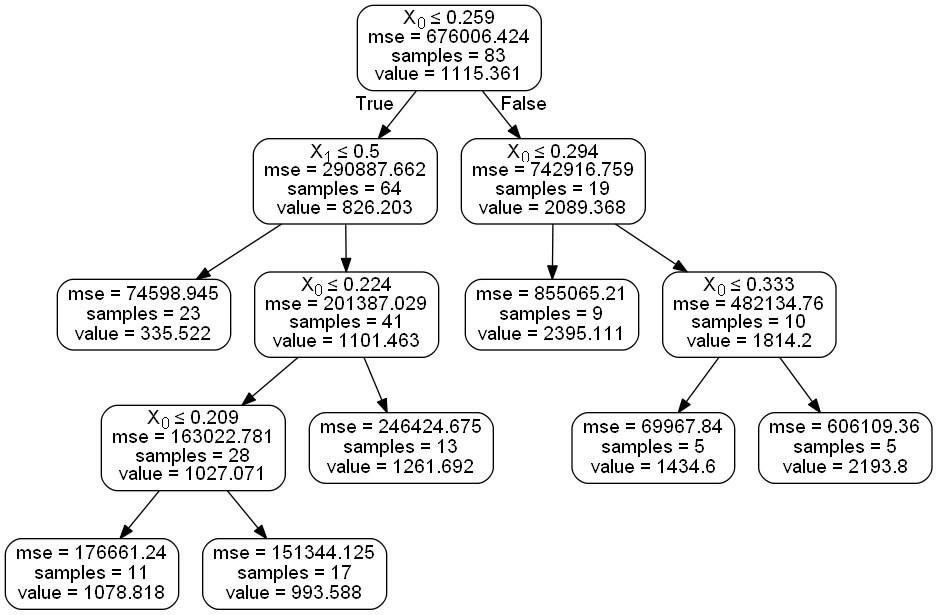

In [35]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, 
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

[실습]
기존 데이터를 활용하여
Decision Tree 로직 외에 
Linear Regression 로직으로
구현하세요

In [36]:
# 모델 라이브러리 선언
from sklearn import datasets, linear_model

# Define Model
model_method = linear_model.LinearRegression()